In [85]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import re 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.util import ngrams
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud

## 1. Read a Dataset
Buka file dan ubah ke dalam bentuk dataframe. Tampilkan head dari dataframe tersebut 

In [86]:
filePath = "../assets/buruh_tweets_202112.csv"
df = pd.read_csv(filePath) 
df.head()  

,tweet,userid
0,"Tak Sesuai Kesepakatan, Buruh Tangerang Raya Tolak Penetapan UMK Banten 2022 hingga Ancam Aksi Besar-besaran https://t.co/sbVetqbNMO",58880688
1,@Resty442_ Kenapa demo buruh yg berjubel2 dapat izin?....makin terang benderang siapa mereka,1330047738541694978
2,Demo Buruh Rentan Ditunggangi Provokator\r\nhttps://t.co/I4Y5n7gAWN\r\nAyo Disiplin Prokes,1213739491384426497
3,"@geloraco buruh, PP juga kemarin demo gak ada tuh pasal2an.. yg ada polisi yg jadi pasien... \r\ndi bali juga simpatisan OPM asoy aja sampe tawuran malah.. sila ke 5 diumpetin kemana..?",930191748688592896
4,Berikanlah kepada buruh upahnya sebelum kering keringatnya. (HR. Abu Yu'la),62988958


In [87]:
pd.set_option('display.max_colwidth', None)

class TweetAnalyzer:
  
  def __init__(self, df):
    self.df = df.copy()
    self.blackList = stopwords.words('indonesian')
    self.cleanTweet()

  def cleanTweet(self):
    self.df["clean_tweet"] = self.df["tweet"].apply(self.caseFolding)
    slangs = ("yg", "aja", "ga", "gak","nggak", "ya", "tdk", "dgn", "utk", "nya") 
    self.df["clean_tweet"] = self.df["clean_tweet"].apply(self.removeSlang, slangs=slangs)
    self.df["clean_tweet"] = self.df["clean_tweet"].apply(self.removeStopWords)   
    self.df["clean_tweet"] = self.df["clean_tweet"].apply(self.stemming) 

  def showHead(self, n=5):
    display(self.df[["tweet"]].head(n)) 
    display(self.df[["clean_tweet"]].head(n))  

  def caseFolding(self, text):
    # 1. convert to lower case
    # 2. remove white space
    # 3. remove digit & link
    # 4. remove punctuation
    text = text.lower().strip()
    text = re.sub(r"\d+|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", text)
    text = text.translate(text.maketrans("", "", string.punctuation))
    return text
  
  def removeSlang(self, text, slangs):
    # i'd love to combined it with remove_StopWords into one method 
    # but just in case of make an additional slang removal, 
    # so i create it separately
    text = word_tokenize(text)
    cleanText = [word for word in text if word not in slangs]
    return " ".join(cleanText)

  def removeStopWords(self, text):
    text = word_tokenize(text)
    cleanText = [word for word in text if word not in self.blackList]
    return " ".join(cleanText) 

  def stemming(self, text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text)

  def showFqCharPerTweet(self):
    self.df["clean_tweet"].str.split().map(lambda x: len(x)).hist(bins=20)
    plt.show()

  def showNumWordPerTweet(self):
    self.df["clean_tweet"].str.len().hist(bins=20)
    plt.show()
  
  def getAvgWord(self, x):
      x = x.split()
      x = map(lambda x: len(x), x)
      return(np.average(list(x)))

  def showAvgWordPerTweet(self):
    self.df["clean_tweet"].apply(self.getAvgWord).hist(bins=20)
  
  def freqWordDist(self, nWord=20):
    self.df["tokenize"] = self.df["clean_tweet"].apply(lambda x: word_tokenize(x)) 
    self.allWord = [word for tweet in self.df["tokenize"] for word in tweet]
    fqdist = FreqDist(self.allWord)
    fqdist.plot(nWord, cumulative=False)

  def nGramsDist(self, n=2, nWord=20):
    self.allWord = [word for tweet in self.df["tokenize"] for word in tweet]
    result = pd.Series(ngrams(self.allWord, n)).value_counts()[:nWord]
    print(result)

  def genWordCloud(self):
    wordcloud = WordCloud(
      width=1000, 
      height=800,
      random_state=1,
      background_color='salmon',
      colormap='Pastel1', 
      collocations=False  
    ).generate(" ".join(self.allWord))
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis("off")
    


## 2. Dataset Preprocessing
Lakukan Preprocessing pada dataset. Simpan kedalam kolom baru dengan nama clean_tweet. Lakukan langkah berikut
* Case folding
* Menghilangkan stopwords
* Menghilangkan bahasa slang


In [88]:
analyze = TweetAnalyzer(df)

## 3. Cleaned Dataset 
Tampilkan head dataframe terbaru

In [89]:
analyze.df.head()

,tweet,userid,clean_tweet
0,"Tak Sesuai Kesepakatan, Buruh Tangerang Raya Tolak Penetapan UMK Banten 2022 hingga Ancam Aksi Besar-besaran https://t.co/sbVetqbNMO",58880688,sesuai sepakat buruh tangerang raya tolak tetap umk banten ancam aksi besarbesaran
1,@Resty442_ Kenapa demo buruh yg berjubel2 dapat izin?....makin terang benderang siapa mereka,1330047738541694978,demo buruh jubel izinmakin terang benderang
2,Demo Buruh Rentan Ditunggangi Provokator\r\nhttps://t.co/I4Y5n7gAWN\r\nAyo Disiplin Prokes,1213739491384426497,demo buruh rentan tunggang provokatorayo disiplin prokes
3,"@geloraco buruh, PP juga kemarin demo gak ada tuh pasal2an.. yg ada polisi yg jadi pasien... \r\ndi bali juga simpatisan OPM asoy aja sampe tawuran malah.. sila ke 5 diumpetin kemana..?",930191748688592896,buruh pp kemarin demo tuh pasal polisi pasien bal simpatisan opm asoy sampe tawur sila diumpetin mana
4,Berikanlah kepada buruh upahnya sebelum kering keringatnya. (HR. Abu Yu'la),62988958,beri buruh upah kering keringat hr abu yula


## 4. Lakukan Text Data Analytic
* Distribusi Frekuensi karakter per tweet
* Distribusi panjang kata per tweet
* Distribusi panjang rata-rata kata per tweet
* Distribusi Kata
* Distribusi bi-gram

### Distribusi Frekuensi karakter per tweet

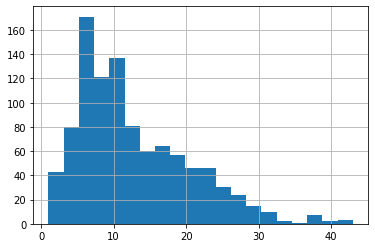

In [90]:
analyze.showFqCharPerTweet()

### Distribusi panjang kata per tweet

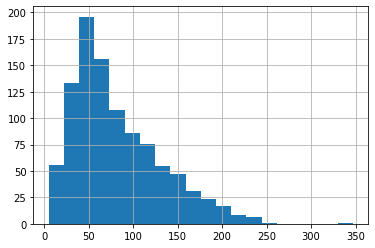

In [91]:
analyze.showNumWordPerTweet()

### Distribusi panjang rata-rata kata per tweet

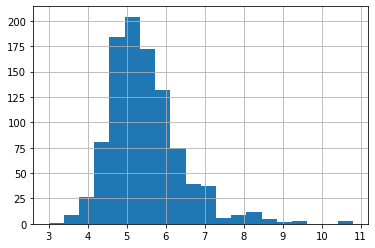

In [92]:
analyze.showAvgWordPerTweet()

### Distribusi Kata

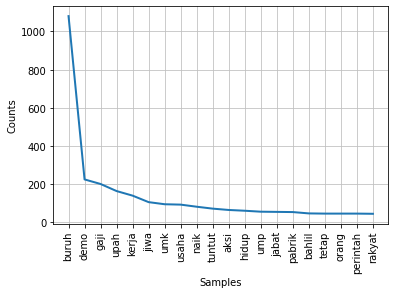

In [93]:
analyze.freqWordDist()

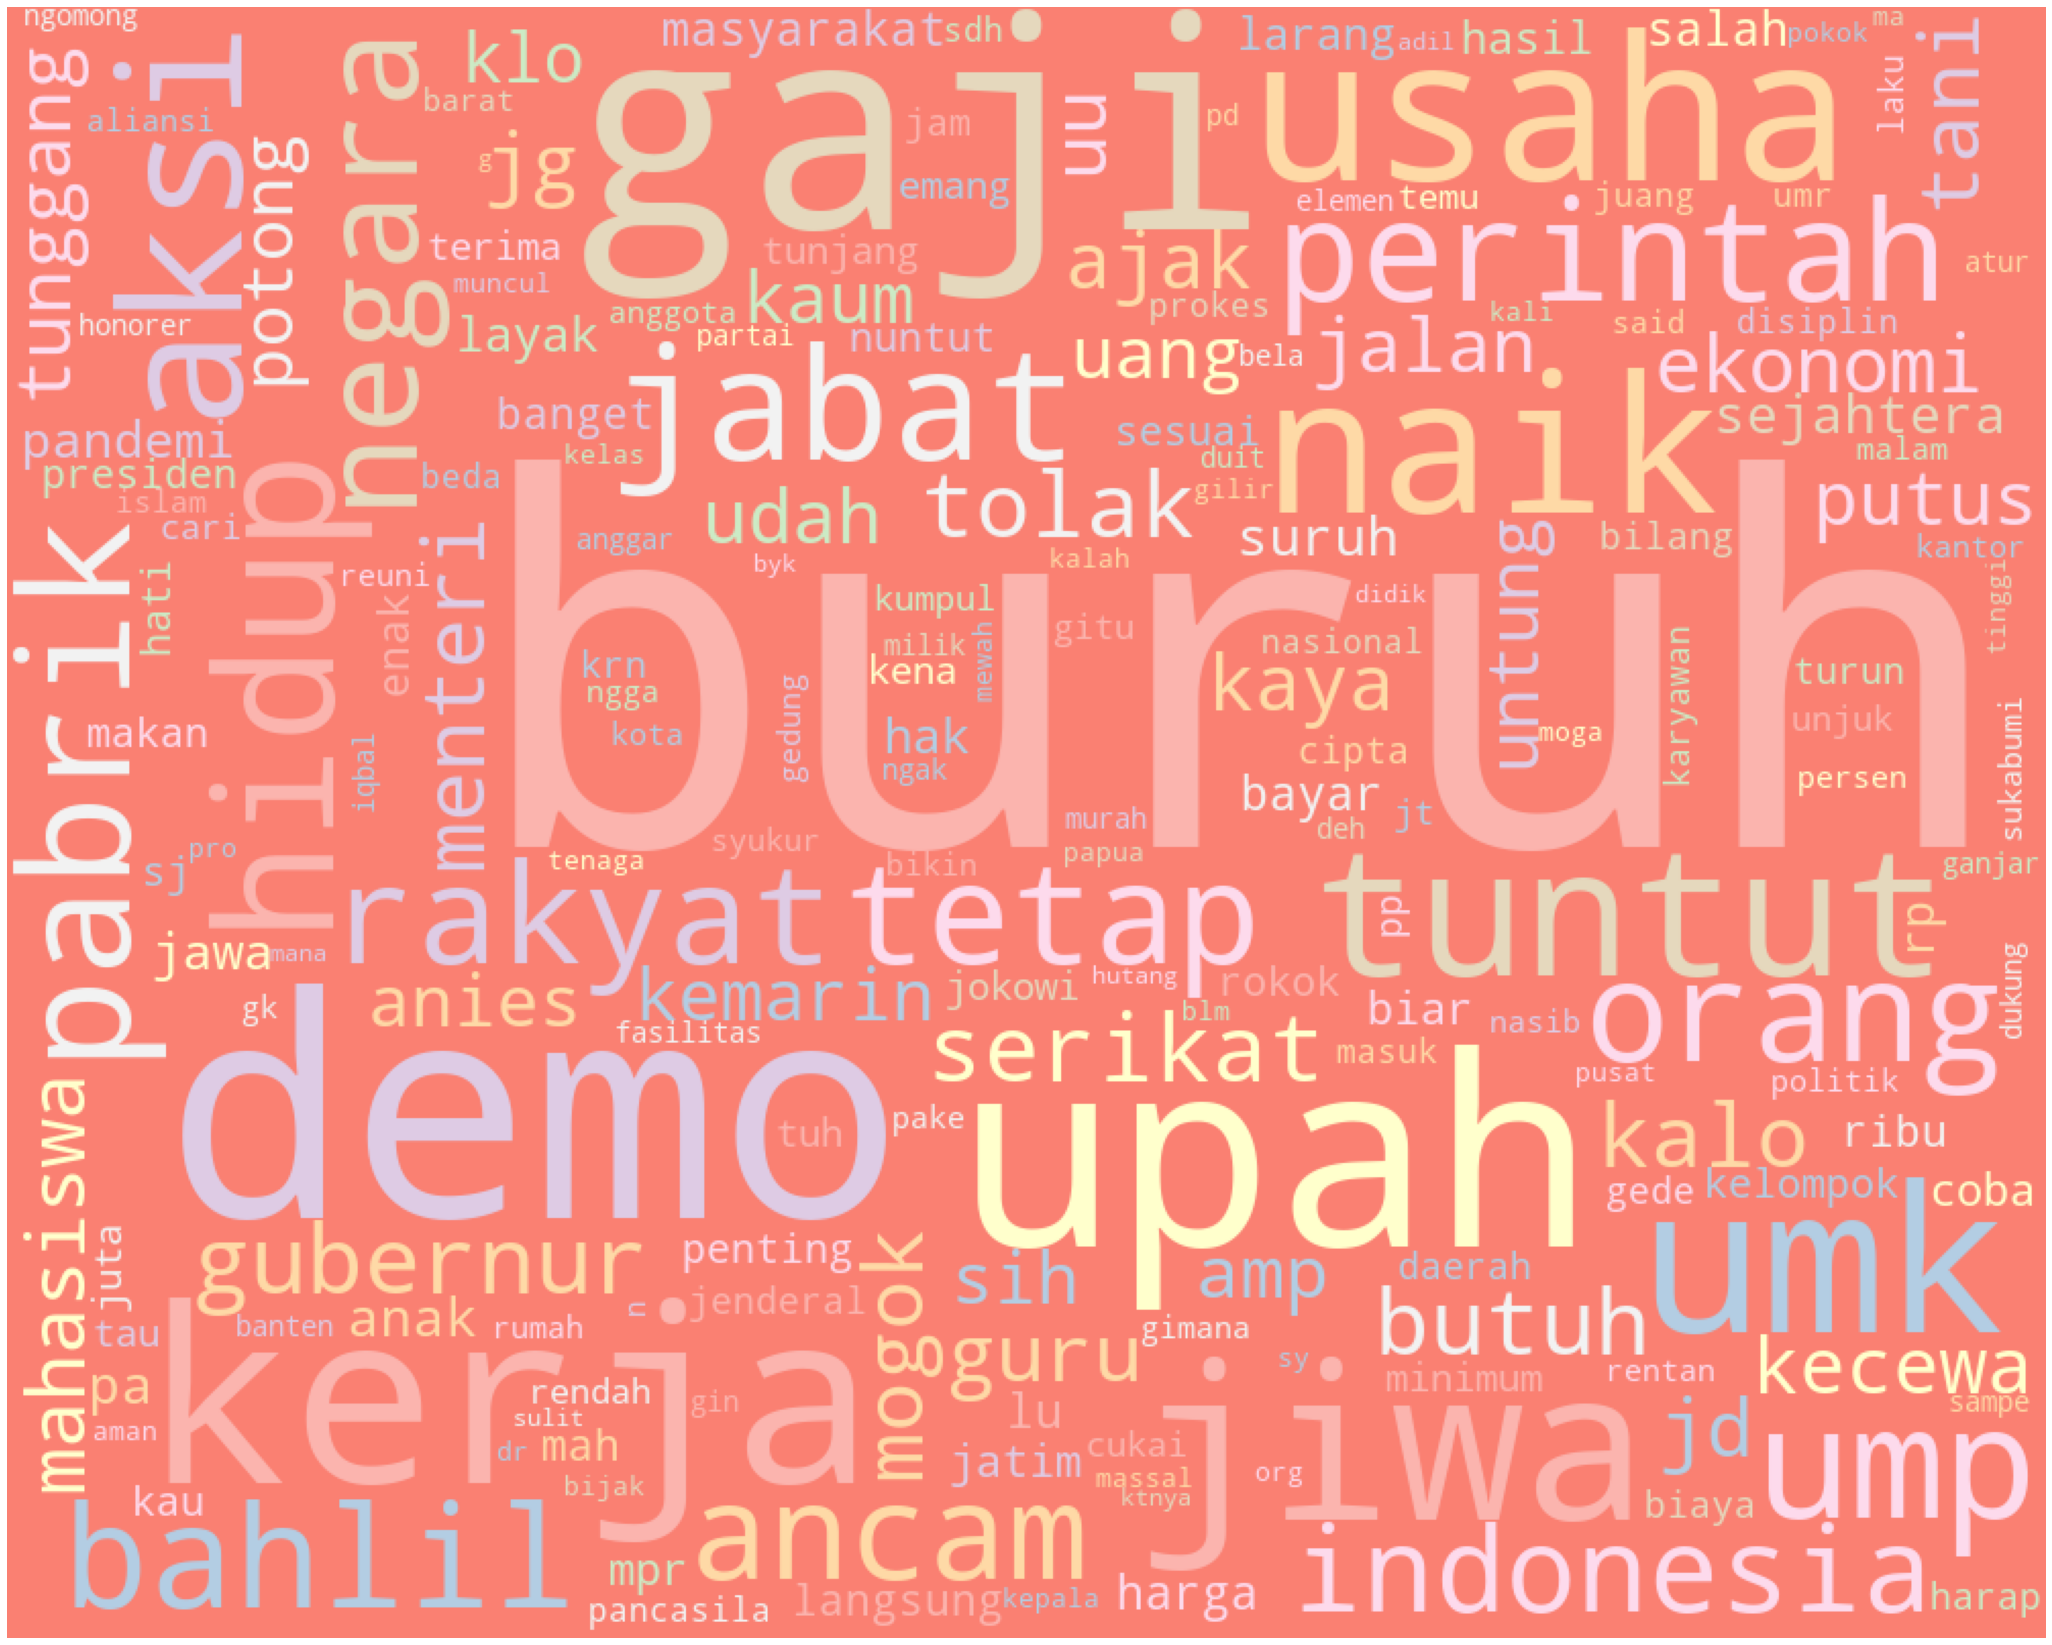

In [94]:
analyze.genWordCloud()

### Distribusi bi-gram

In [95]:
analyze.nGramsDist(n=2)

(demo, buruh)       97
(buruh, demo)       54
(buruh, pabrik)     33
(upah, buruh)       31
(buruh, jiwa)       28
(serikat, buruh)    26
(tuntut, upah)      25
(kaum, buruh)       22
(gaji, buruh)       21
(naik, upah)        21
(buruh, buruh)      19
(jiwa, tuntut)      18
(buruh, tuntut)     17
(mogok, kerja)      17
(upah, minimum)     17
(kerja, buruh)      16
(buruh, tani)       16
(tetap, ump)        15
(cipta, kerja)      15
(buruh, jawa)       14
dtype: int64


## 5. Lakukan analisis dan jelaskan temuan kalian.

### a. Distribusi Frekuensi karakter per tweet
### b. Distribusi panjang kata per tweet
### c. Distribusi panjang rata-rata kata per tweet
### d. Distribusi Kata
### e. Distribusi bi-gram

Pada distribusi n-gram dengan nilai n=2 (bi-gram) menunjukkan perbincangan yang terjadi pada warganet. Topik yang dibicarakan adalah mengenai demo buruh beserta tuntutan-nya.   